# Stocks Prediction

## Capstone Project 2 - Grant Chiu

### Introduction

1: What is the Stock Market? The term stock market refers to several exchanges in which share of pulicly held companies are bought and sold. Such financial activities are conducted through formal exchanges and through over-the-counter (OTC) marketplaces that operated under a definded set of regulations. The goal is to create a predictive model that will determine the trend of Apple stock price. This is a time series analysis.

### The Data

The data was taken from yahoo finance, it is a credible, reliable website with daily stock price stats. The data ranges from 2013-12-01 to 2022-12-01, a decade span of time. Following are the features in the dataset, while closing price refers to the cost of shares at the end of the day, the adjusted closing price considers other factores like dividends, stock splits, and new stock offerings. Since the adjusted closing price begins where the closing price ends, it can be called a more accurate measure of stock's value.

* High
* Low
* Open
* Close
* Volume
* Adj Close

## Load relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from prophet import Prophet


In [2]:
df = pd.read_csv('AAPL (10years).csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862822,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649977,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186195,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090992,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134289,458707200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2514,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2515,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
2516,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700


## Data Wrangling

In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,62.383387,63.087693,61.696664,62.416599,60.637030,1.713540e+08
std,48.683035,49.322128,48.051043,48.709794,49.248659,1.250498e+08
min,13.856071,14.271429,13.753571,13.947500,12.064583,3.519590e+07
25%,26.971249,27.219376,26.705000,26.983750,24.676633,9.188698e+07
50%,41.353750,41.872500,40.888750,41.313750,39.511671,1.301368e+08
75%,91.272499,92.881876,90.824377,91.526875,90.122929,2.045116e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,1.460852e+09


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m")
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862822,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649977,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186195,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090992,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134289,458707200


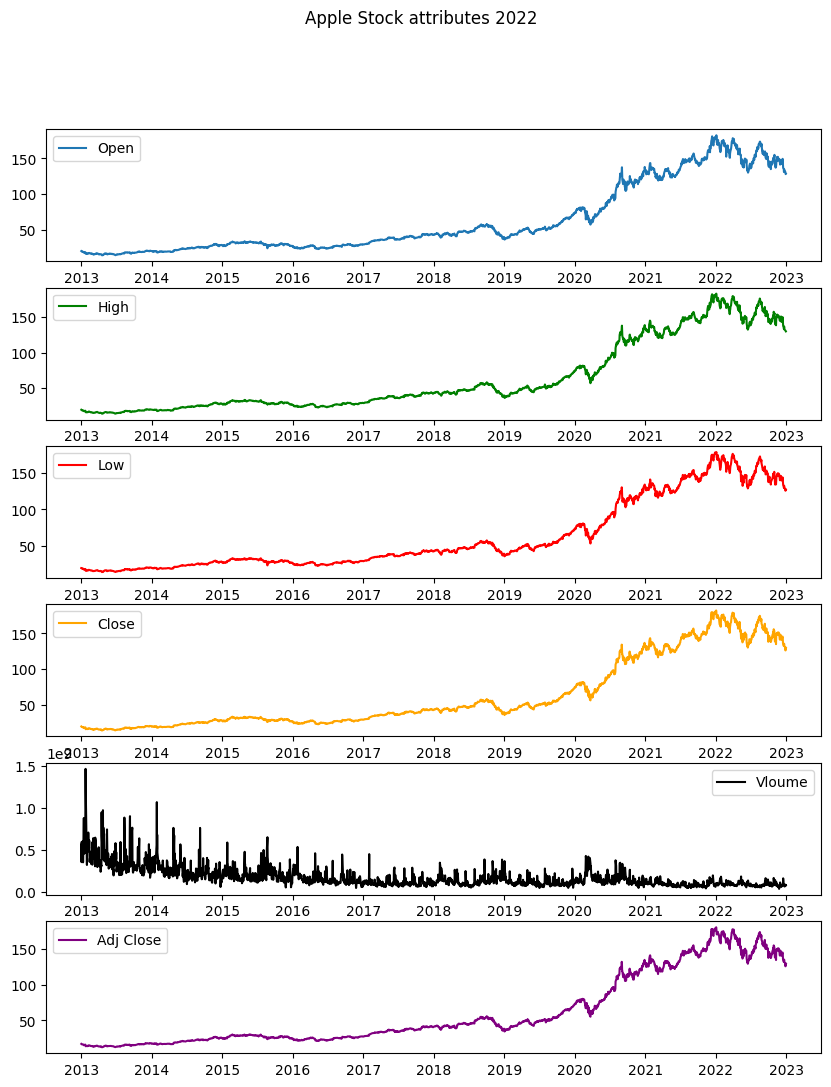

In [8]:
#visualizing the datasets

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(10, 12))
plt.suptitle('Apple Stock attributes 2022')
ax1.plot(df['Open'])
ax1.legend(['Open'])
ax2.plot(df['High'], c='g')
ax2.legend(['High'])
ax3.plot(df['Low'], c='r')
ax3.legend(['Low'])
ax4.plot(df['Close'], c='orange')
ax4.legend(['Close'])
ax5.plot(df['Volume'], c='black')
ax5.legend(['Vloume'])
ax6.plot(df['Adj Close'], c='purple')
ax6.legend(['Adj Close'])

### Volume of Sales

Text(0, 0.5, '% of Return')

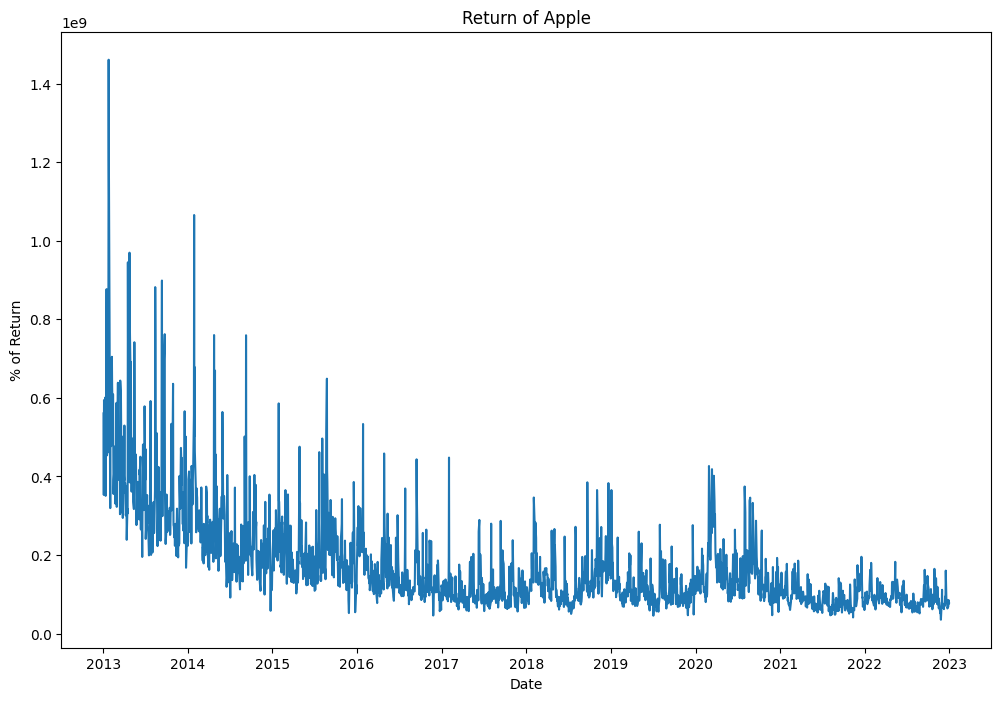

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df['Volume'])
plt.title('Return of Apple')
plt.xlabel('Date')
plt.ylabel('% of Return')

### Moving Average of Apple Stock Price

In [10]:
# Exponential moving average
df['EMA_5days'] = df['Adj Close'].ewm(span=5).mean()
df['EMA_10days'] = df['Adj Close'].ewm(span=10).mean()
df['EMA_30days'] = df['Adj Close'].ewm(span=30).mean()


In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA_5days,EMA_10days,EMA_30days
Date,,,,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862822,560518000,16.862822,16.862822,16.862822
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649977,352965200,16.735115,16.745757,16.752852
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186195,594333600,16.475100,16.520817,16.551239
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090992,484156400,16.315548,16.379209,16.424424
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134289,458707200,16.245965,16.308899,16.358411
...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900,133.506589,135.933093,141.063983
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800,132.347726,134.859803,140.352113
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400,130.245151,133.256203,139.428751


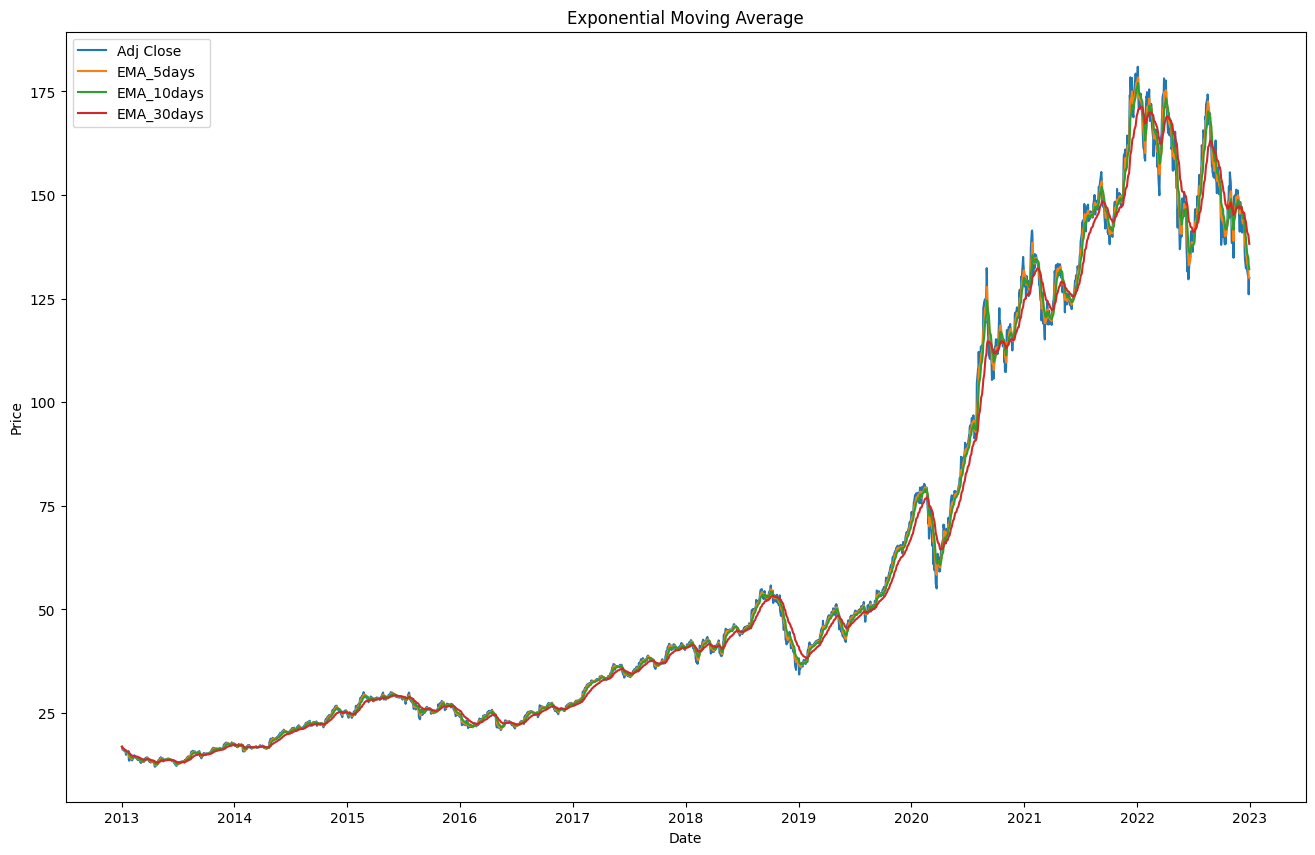

In [12]:
plt.figure(figsize=(16, 10))
plt.plot(df['Adj Close'], label='Adj Close')
plt.plot(df['EMA_5days'], label='EMA_5days')
plt.plot(df['EMA_10days'], label='EMA_10days')
plt.plot(df['EMA_30days'], label='EMA_30days')
plt.title('Exponential Moving Average')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')

### Daily Return 

Text(0, 0.5, '% of Return')

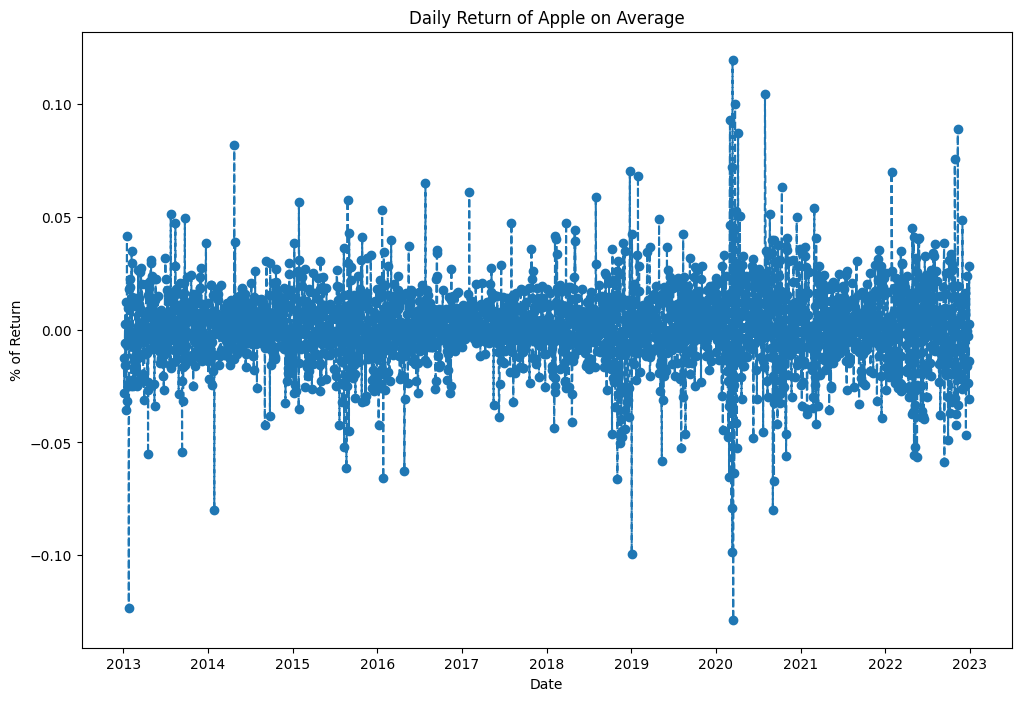

In [13]:
plt.figure(figsize=(12,8))
plt.plot(df['Adj Close'].pct_change(), linestyle='--', marker='o')
plt.title('Daily Return of Apple on Average')
plt.xlabel('Date')
plt.ylabel('% of Return')


Text(0, 0.5, 'Daily Return')

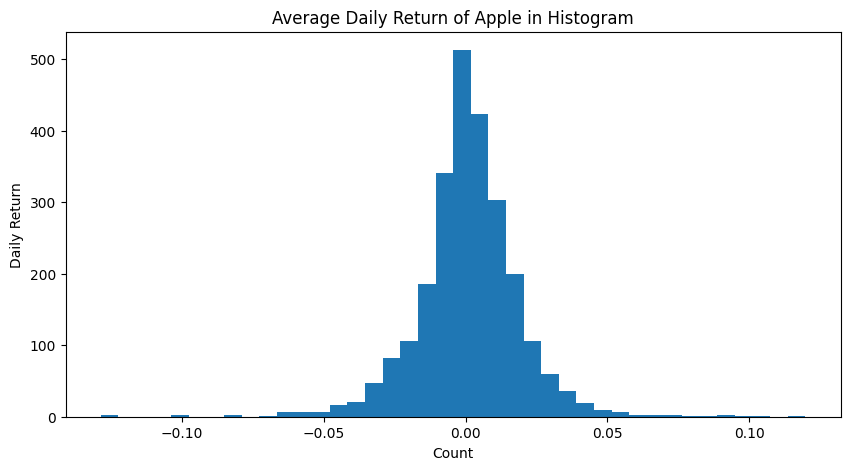

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(df['Adj Close'].pct_change(), bins=40)
plt.title('Average Daily Return of Apple in Histogram')
plt.xlabel('Count')
plt.ylabel('Daily Return')

In [15]:
# Feature Prune

df = df['Adj Close']

In [16]:
df

Date
2013-01-02     16.862822
2013-01-03     16.649977
2013-01-04     16.186195
2013-01-07     16.090992
2013-01-08     16.134289
                 ...    
2022-12-23    131.860001
2022-12-27    130.029999
2022-12-28    126.040001
2022-12-29    129.610001
2022-12-30    129.929993
Name: Adj Close, Length: 2518, dtype: float64

In [17]:
df_interpol = df.resample('BM').interpolate(method='time')
df_interpol

Date
2013-01-31     13.989855
2013-02-28     13.636104
2013-03-29     13.656373
2013-04-30     13.678738
2013-05-31     13.985404
                 ...    
2022-08-31    156.959625
2022-09-30    137.971115
2022-10-31    153.086044
2022-11-30    148.029999
2022-12-30    129.929993
Freq: BM, Name: Adj Close, Length: 120, dtype: float64

In [18]:
df_interpol.isna().sum()

0

In [19]:
df_interpol.sort_index(inplace=True)

### Train Test Split

In [20]:
# n = int(len(df_interpol)*0.7)
train = df_interpol[:-12]
test = df_interpol[len(train):]

display(train.tail(), test.head())

Date
2021-08-31    150.733917
2021-09-30    140.478485
2021-10-29    148.718552
2021-11-30    164.346176
2021-12-31    176.545380
Freq: BM, Name: Adj Close, dtype: float64

Date
2022-01-31    173.771469
2022-02-28    164.376373
2022-03-31    173.823639
2022-04-29    156.940002
2022-05-31    148.387390
Freq: BM, Name: Adj Close, dtype: float64

In [21]:
##########3331112asdfasdfasdfasdfasdfasdf

In [22]:
from pycaret.time_series import *

In [23]:
exp = setup(data=train, target='Adj Close', session_id=123, fh=12)

,Description,Value
0,session_id,123
1,Target,Adj Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(108, 1)"
5,Transformed data shape,"(108, 1)"
6,Transformed train set shape,"(96, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [24]:
exp.plot_model(plot='train_test_split')

In [25]:
exp.plot_model(plot='decomp')

In [26]:
exp.plot_model(plot='acf')

In [27]:
exp.plot_model(plot='pacf')

In [28]:
top3 = compare_models(
    turbo=False,
    n_select=3,
    sort='RMSE'
)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,6.2534,5.9740,11.4229,14.7903,0.1390,0.1555,-0.2256,0.0667
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,6.4983,6.2770,11.8629,15.5669,0.1446,0.1638,-0.3720,0.0733
ets,ETS,7.0735,6.4980,12.7916,16.1037,0.1665,0.1887,-0.5984,0.3600
exp_smooth,Exponential Smoothing,7.0736,6.4980,12.7917,16.1037,0.1665,0.1887,-0.5984,0.0167
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,6.9226,6.5181,12.5726,16.1425,0.1584,0.1799,-0.5344,0.0800
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,7.3349,6.9459,13.1520,16.8945,0.1693,0.1940,-0.8509,0.1333
auto_arima,Auto ARIMA,7.5113,6.8342,13.5265,16.9126,0.1798,0.2067,-0.8843,0.1100
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,7.3487,6.9187,13.4168,17.2058,0.1647,0.1903,-0.6644,0.1367
theta,Theta Forecaster,7.6178,7.0814,13.7878,17.5110,0.1769,0.2045,-0.8716,0.0133
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,7.4104,7.0455,13.5886,17.5297,0.1626,0.1891,-0.6755,0.1067


In [29]:
for model in top3:
    exp.plot_model(model)

### Decision Tree

In [30]:
dt_cds_dt = exp.create_model('dt_cds_dt', fold=3)
plot_model(dt_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-12,3.4517,3.7014,4.6900,6.2094,0.0980,0.1032,-0.2450
1,2018-12,3.5925,3.4664,6.0304,8.3411,0.1031,0.1116,0.2079
2,2019-12,11.7158,10.7543,23.5483,29.8203,0.2157,0.2516,-0.6397
Mean,NaT,6.2534,5.9740,11.4229,14.7903,0.1390,0.1555,-0.2256
SD,NaT,3.8630,3.3815,8.5914,10.6634,0.0543,0.0681,0.3463


### Tune Decision Tree

In [31]:
dt_cds_dt.get_params()

{'degree': 1,
 'deseasonal_model': 'additive',
 'fe_target_rr': [WindowSummarizer(lag_feature={'lag': [1]}, n_jobs=1)],
 'regressor__ccp_alpha': 0.0,
 'regressor__criterion': 'squared_error',
 'regressor__max_depth': None,
 'regressor__max_features': None,
 'regressor__max_leaf_nodes': None,
 'regressor__min_impurity_decrease': 0.0,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__min_weight_fraction_leaf': 0.0,
 'regressor__random_state': 123,
 'regressor__splitter': 'best',
 'regressor': DecisionTreeRegressor(random_state=123),
 'sp': 1,
 'window_length': 1}

In [32]:
tuned_dt = exp.tune_model(dt_cds_dt, fold=3, optimize='RMSE', choose_better=True)
plot_model(tuned_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-12,5.4516,6.3549,7.4072,10.6607,0.1755,0.1481,-2.6699
1,2018-12,3.5585,2.7527,5.9734,6.6238,0.1250,0.1158,0.5005
2,2019-12,9.9647,9.1045,20.0286,25.2457,0.1841,0.2093,-0.1752
Mean,NaT,6.3249,6.0707,11.1364,14.1767,0.1615,0.1577,-0.7815
SD,NaT,2.6872,2.6009,6.3149,7.9985,0.0261,0.0388,1.3635


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


### Gradient Boosting

In [33]:
gbr_cds_dt = exp.create_model('gbr_cds_dt', fold=3)
plot_model(gbr_cds_dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-12,3.2507,3.5388,4.4168,5.9365,0.0913,0.0968,-0.1380
1,2018-12,4.4615,4.4711,7.4891,10.7586,0.1259,0.1414,-0.3178
2,2019-12,11.7828,10.8211,23.6830,30.0055,0.2167,0.2533,-0.6601
Mean,NaT,6.4983,6.2770,11.8629,15.5669,0.1446,0.1638,-0.3720
SD,NaT,3.7692,3.2356,8.4516,10.3977,0.0529,0.0658,0.2166


### Tune Gradient Boosting

In [34]:
gbr_cds_dt.get_params()

{'degree': 1,
 'deseasonal_model': 'additive',
 'fe_target_rr': [WindowSummarizer(lag_feature={'lag': [1]}, n_jobs=1)],
 'regressor__alpha': 0.9,
 'regressor__ccp_alpha': 0.0,
 'regressor__criterion': 'friedman_mse',
 'regressor__init': None,
 'regressor__learning_rate': 0.1,
 'regressor__loss': 'squared_error',
 'regressor__max_depth': 3,
 'regressor__max_features': None,
 'regressor__max_leaf_nodes': None,
 'regressor__min_impurity_decrease': 0.0,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__min_weight_fraction_leaf': 0.0,
 'regressor__n_estimators': 100,
 'regressor__n_iter_no_change': None,
 'regressor__random_state': 123,
 'regressor__subsample': 1.0,
 'regressor__tol': 0.0001,
 'regressor__validation_fraction': 0.1,
 'regressor__verbose': 0,
 'regressor__warm_start': False,
 'regressor': GradientBoostingRegressor(random_state=123),
 'sp': 1,
 'window_length': 1}

In [35]:
tuned_gbr = exp.tune_model(gbr_cds_dt, fold=3, optimize='RMSE', choose_better=True)
plot_model(tuned_gbr)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-12,5.8182,6.5555,7.9053,10.9972,0.1867,0.1577,-2.9053
1,2018-12,5.6277,4.2422,9.4467,10.2078,0.1963,0.1755,-0.1863
2,2019-12,11.6876,10.5281,23.4916,29.1932,0.2149,0.2521,-0.5714
Mean,NaT,7.7112,7.1086,13.6145,16.7994,0.1993,0.1951,-1.2210
SD,NaT,2.8129,2.5959,7.0124,8.7697,0.0117,0.0410,1.2013


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


### blend models

In [36]:
blender = exp.blend_models(top3, fold=3, choose_better=True, optimize='RMSE')
plot_model(blender)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-12,3.2026,3.4508,4.3515,5.7889,0.0906,0.0948,-0.0821
1,2018-12,4.8449,4.5564,8.1327,10.9640,0.1384,0.1553,-0.3686
2,2019-12,11.5795,10.6226,23.2744,29.4550,0.2134,0.2482,-0.5998
Mean,NaT,6.5423,6.2099,11.9195,15.4026,0.1475,0.1661,-0.3502
SD,NaT,3.6244,3.1527,8.1761,10.1587,0.0505,0.0631,0.2117


Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


In [51]:
final_model = exp.finalize_model(blender)
pred_holdout = exp.predict_model(final_model, fh=24)

### Graph of DecisionTree, GradientBoosting, Blend Model

<AxesSubplot: xlabel='Date'>

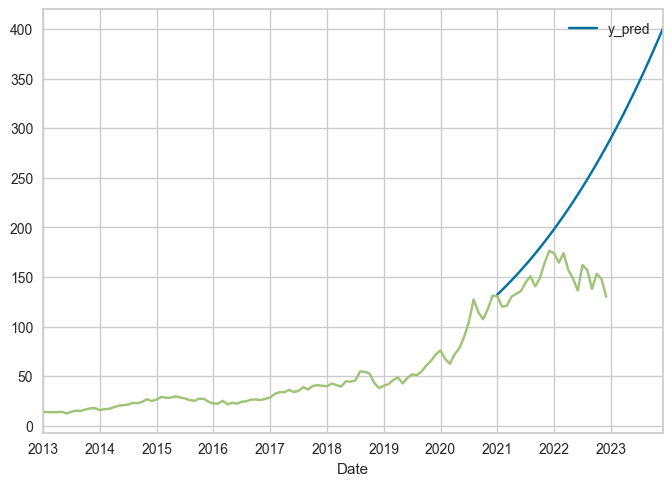

In [50]:
# predict with tuned decision tree
preds_dt = predict_model(tuned_dt, fh=36)

ax = preds_dt.plot()
df_interpol.plot(ax=ax)

<AxesSubplot: xlabel='Date'>

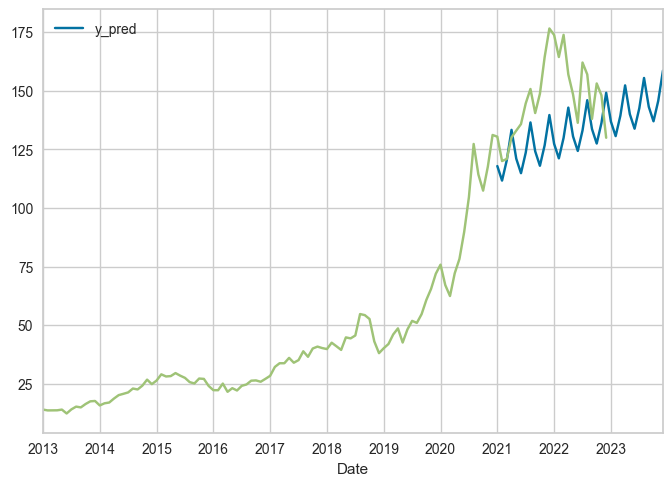

In [49]:
# predict with tuned gradient boosting
preds_gbr = predict_model(tuned_gbr, fh=36)

ax = preds_gbr.plot()
df_interpol.plot(ax=ax)

<AxesSubplot: xlabel='Date'>

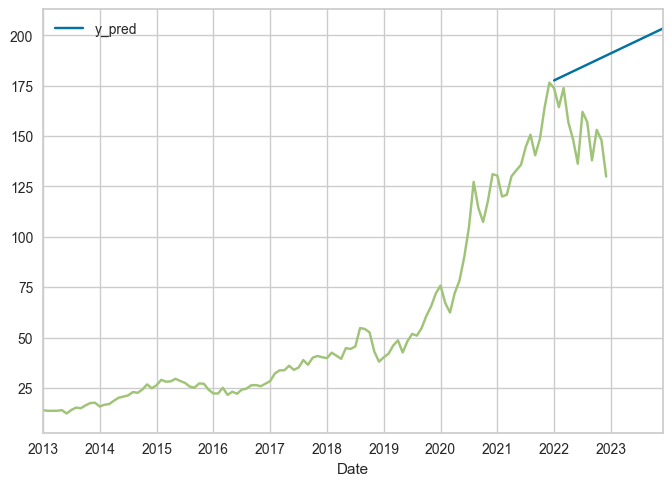

In [52]:
ax = pred_holdout.plot()
df_interpol.plot(ax=ax)

### Metrics for DecisionTree, GradientBoosting, Blend

In [53]:
from sklearn.metrics import mean_squared_error

rmse_dt = mean_squared_error(test.values, preds_dt.loc['2022','y_pred'])**.5
rmse_gbr = mean_squared_error(test.values, preds_gbr.loc['2022','y_pred'])**.5
rmse_blend = mean_squared_error(test.values, pred_holdout.loc['2022','y_pred'])**.5

print(f'Decision Tree RMSE: {rmse_dt}')
print(f'Gradient Boosting RMSE: {rmse_gbr}')
print(f'Blend RMSE: {rmse_blend}')

Decision Tree RMSE: 92.23756861472717
Gradient Boosting RMSE: 27.026212648367938
Blend RMSE: 34.570522202136125


## Conclustion 

In conclusion, the time series analysis for Apple stock price ranging from 2013 to 2022 was conducted using PyCaret and three machine learning models: Decision Tree, Gradient Boosting, and Blend Models. Out of all three models, Gradient Boosting had the lowest Root Mean Squared Error (RMSE) of 27.02, indicating its effectiveness in predicting the stock price of Apple. The results demonstrate that Gradient Boosting can be a valuable tool for predicting the stock prices of companies, particularly in the case of Apple. Overall, this study highlights the importance of using machine learning models in time series analysis and the potential for further improvement in stock price prediction.

In order to improve the project and make the predictions even more accurate, it would be beneficial to implement a news API. The integration of a news API in the time series analysis project can enhance the predictions by leveraging the power of Natural Language Processing (NLP) and machine learning. The API would allow for a systematic search and analysis of news articles relevant to the stock market and the company in question. This would provide a deeper understanding of what is being said about the company and its impact on the stock market. 

By incorporating a news API, the time series analysis would be able to identify any positive or negative news about the company in real-time and respond accordingly. Positive news can be leveraged for promotional purposes, while negative news can be addressed proactively to prevent potential PR issues. This integration would provide a more comprehensive understanding of the stock market and the factors that drive stock prices, leading to improved predictions and valuable insights for investors. The implementation of a news API would optimize the time series analysis to deliver real-time, actionable information for better decision making.

